<a href="https://colab.research.google.com/github/maretafernanda/portfolio/blob/main/SeoulBikeAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Analyst
Data Exploration Exercise
- The Datasets is from [Kaggle.com](https://www.kaggle.com)



## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases #Python has a file containing a dictionary of encoding names and associated aliases

#the matplotlib plots will appear directly below the cell in which the plot function was called
%matplotlib inline

## Read the CSV Files and remove duplicates

Import the CSV from the Local Drive

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [4]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
  try:
    df=pd.read_csv("/content/SeoulBikeData.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
    print('successful', encoding)
  except:
    pass

successful mac_iceland
successful cp863
successful hp_roman8
successful iso8859_7
successful cp861
successful cp1250
successful cp1256
successful cp437
successful koi8_r
successful cp858
successful mac_roman
successful iso8859_8
successful kz1048
successful iso8859_14
successful gb18030
successful shift_jis_2004
successful cp864
successful cp950
successful latin_1
successful iso8859_2
successful iso8859_9
successful cp1251
successful cp862
successful cp1252
successful cp932
successful iso8859_4
successful big5
successful iso8859_15
successful iso8859_11
successful utf_16_be
successful cp273
successful cp857
successful cp1253
successful cp1254
successful gbk
successful cp855
successful cp500
successful cp869
successful mac_greek
successful iso8859_13
successful shift_jis
successful mac_turkish
successful ptcp154
successful cp1258
successful cp1257
successful cp1026
successful utf_16_le
successful cp1255
successful cp1125
successful mac_cyrillic
successful cp860
successful iso8859_16
suc

In [5]:
# Read in the SeoulBike.csv file and use the timestamp as a datetime index
bike=pd.read_csv("/content/SeoulBikeData.csv", encoding="ISO-8859-11")

In [6]:
# Quick check on how the dataset looks like
bike.head()

,Date,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking the shape of the dataset. It has 8760 rows and 14 columns
bike.shape

(8760, 14)

In [8]:
# Checking and counting the duplicate rows. It has 0 rows being duplicate
bike.duplicated().sum()

0

## Explore the Dataset

In [9]:
# Quick check of the beginning of the dataframe
bike.head()

,Date,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
# Quick check of the end of the dataframe
bike.tail()

,Date,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
# Quick check for both the beginning and the end of the dataframe
bike

,Date,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
# Summary information about the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(ฐC)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(ฐC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
# Changing the data type from object to datetime for the 'Date' column
bike.Date = pd.to_datetime(bike.Date)

<ipython-input-14-ee81988dfe78>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bike.Date = pd.to_datetime(bike.Date)


In [15]:
# Checked if changing data type is worked
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(ฐC)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(ฐC)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [16]:
# 1. Extract datetime information from the 'Date' column by Year
bike.Date.dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Date, Length: 8760, dtype: int64

In [17]:
# 2. Extract datetime information from the 'Date' column by Month
bike.Date.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int64

In [18]:
# 3. Extract datetime information from the 'Date' column by Week
bike.Date.dt.week

<ipython-input-18-3e496dc889fc>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  bike.Date.dt.week


0        2
1        2
2        2
3        2
4        2
        ..
8755    48
8756    48
8757    48
8758    48
8759    48
Name: Date, Length: 8760, dtype: int64

In [20]:
# Summary information of the numeric columns
bike.describe()

,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [21]:
# Summary information on the non-numeric columns
bike.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


In [22]:
# Show all the columns
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(ฐC)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ฐC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [23]:
# Checking for columns with missing values
bike.columns[np.sum(bike.isnull())!=0]

Index([], dtype='object')

In [24]:
# Checking for columns with no missing values
bike.columns[np.sum(bike.isnull())==0]

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(ฐC)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ฐC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [27]:
# Checking for the number of unique values in each column
for col in bike.columns:
  unique_count = bike[col].nunique()
  print(col + " has " + str(unique_count) + " unique values")

Date has 365 unique values
Rented Bike Count has 2166 unique values
Hour has 24 unique values
Temperature(ฐC) has 546 unique values
Humidity(%) has 90 unique values
Wind speed (m/s) has 65 unique values
Visibility (10m) has 1789 unique values
Dew point temperature(ฐC) has 556 unique values
Solar Radiation (MJ/m2) has 345 unique values
Rainfall(mm) has 61 unique values
Snowfall (cm) has 51 unique values
Seasons has 4 unique values
Holiday has 2 unique values
Functioning Day has 2 unique values


## Answer some questions

In [29]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(ฐC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ฐC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [28]:
# What are the most common Seasons for renting a bike in Seoul?
bike.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64

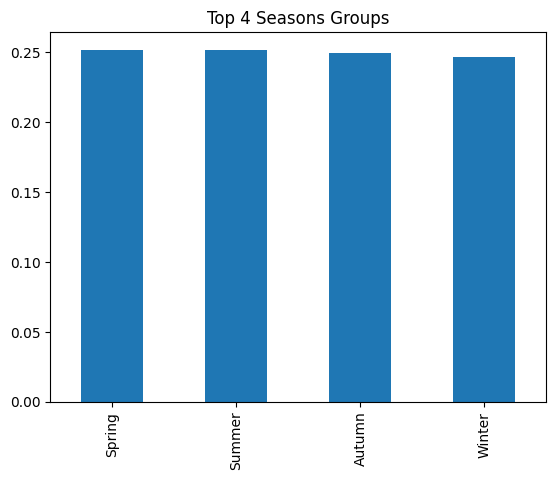

In [34]:
seasons_group_vals = bike.Seasons.value_counts()

display(seasons_group_vals / bike.shape[0])

# Creating a bar chart of the Top 4 Seasons groups
(seasons_group_vals / bike.shape[0]).plot(kind='bar');
plt.title('Top 4 Seasons Groups');